# <div style="text-align: center;">REGRESSÃO NÃO LINEAR MÚLTIPLA</div>

## Análise financeira da empresa TC Technology Ltd. (nome fictício)
Objetivo: Análise financeira da empresa TC Technology Ltd., utilizando a técnica de regressão não linear múltipla para prever o retorno das ações com base em diversos indicadores financeiros. A análise abrange fatores como Retorno, Disclosure, Endividamento, Ativos, Liquidez, etc.

In [1]:
# Instalação dos pacotes

!pip install pandas
!pip install numpy
!pip install -U seaborn
!pip install matplotlib
!pip install plotly
!pip install scipy
!pip install statsmodels
!pip install scikit-learn
!pip install playsound
!pip install pingouin
!pip install emojis
!pip install statstests

In [2]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import plotly.graph_objects as go # gráficos 3D
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from sklearn.preprocessing import LabelEncoder # transformação de dados
from playsound import playsound # reprodução de sons
import pingouin as pg # outro modo para obtenção de matrizes de correlações
import emojis # inserção de emojis em gráficos
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'

In [4]:
###################################################################################
#                        REGRESSÃO NÃO LINEAR MÚLTIPLA                            #
#  Temos o seguinte:                                                              #
#   Y (retorno) : é uma variável QUANTITATIVA                                     #
#   X (disclosure, endividamento, ativos, liquidez): são variáveis QUANTITATIVAS  #
#                 Resumindo:                                                      #
#                     Variáveis Dependente e Explicativas são quantitativas       #
###################################################################################

In [5]:
df_empresas = pd.read_csv('empresas.csv', delimiter=',')
df_empresas

,empresa,retorno,disclosure,endividamento,ativos,liquidez
0,Adidas,63.67,83,1.3,3967,14.3
1,BASF,55.49,91,33.9,5450,16.8
2,Bayer,52.42,77,36.1,4327,15.5
3,BSH,54.00,90,20.8,4109,16.8
4,Bosch,68.01,93,14.1,4458,17.0
...,...,...,...,...,...,...
119,DuPont,39.85,41,49.5,2996,10.5
120,ExxonMobil,44.16,35,16.8,3622,12.3
121,FedEx,45.38,24,16.1,2972,9.7
122,Ford Motors,45.25,68,34.8,4691,8.9


In [6]:
# Características das variáveis do dataset
df_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   empresa        124 non-null    object 
 1   retorno        124 non-null    float64
 2   disclosure     124 non-null    int64  
 3   endividamento  124 non-null    float64
 4   ativos         124 non-null    int64  
 5   liquidez       124 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.9+ KB


In [7]:
# Estatísticas univariadas
df_empresas.describe()

,retorno,disclosure,endividamento,ativos,liquidez
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,46.195484,49.677419,27.734677,3739.064516,12.300000
std,15.075886,31.338059,12.454287,1538.500462,3.141746
min,21.030000,6.000000,1.200000,1851.000000,7.900000
25%,33.840000,18.000000,18.525000,2597.000000,9.300000
50%,44.175000,41.000000,24.950000,3476.000000,12.200000
75%,58.205000,83.000000,34.125000,4458.000000,15.800000
max,86.180000,98.000000,64.900000,9010.000000,17.000000


#### Matriz de correlações

In [8]:
correlation_matrix = df_empresas.iloc[:,1:6].corr()
correlation_matrix

,retorno,disclosure,endividamento,ativos,liquidez
retorno,1.000000,0.863747,0.004577,0.811349,0.859083
disclosure,0.863747,1.000000,0.136587,0.831343,0.867605
endividamento,0.004577,0.136587,1.000000,0.228085,-0.081803
ativos,0.811349,0.831343,0.228085,1.000000,0.702286
liquidez,0.859083,0.867605,-0.081803,0.702286,1.000000


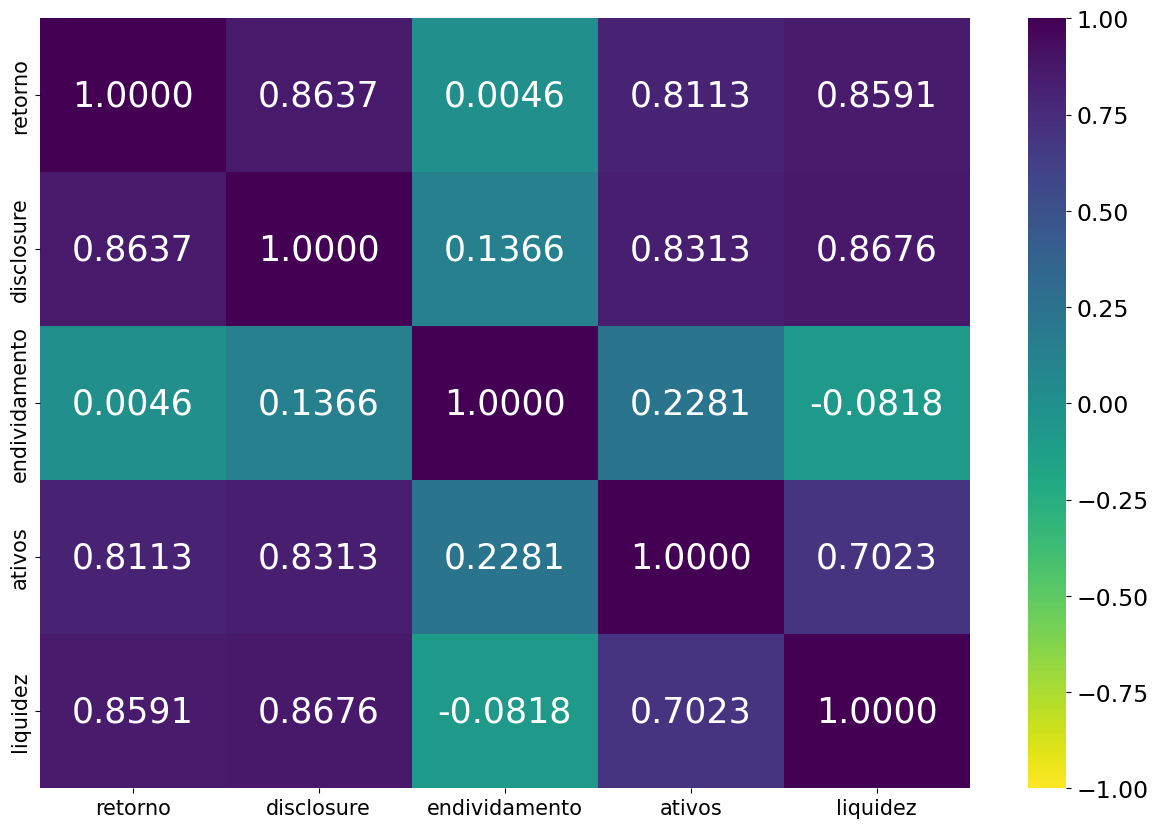

In [9]:
# Mapa de calor com as correlações entre todas as variáveis quantitativas
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 25}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.show()

#### Matriz de correlações
Maneira mais elaborada pela função 'rcorr' do pacote 'pingouin'

In [10]:
import pingouin as pg

correlation_matrix2 = pg.rcorr(df_empresas, method='pearson',
                              upper='pval', decimals=4,
                              pval_stars={0.01: '***',
                                          0.05: '**',
                                          0.10: '*'})
correlation_matrix2

C:\Users\Khomp\USPesalqMBA\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,retorno,disclosure,endividamento,ativos,liquidez
retorno,-,***,,***,***
disclosure,0.8637,-,,***,***
endividamento,0.0046,0.1366,-,**,
ativos,0.8113,0.8313,0.2281,-,***
liquidez,0.8591,0.8676,-0.0818,0.7023,-


#### Diagrama interessante (grafo) que mostra a inter-relação entre as variáveis e a magnitude das correlações entre elas

C:\Users\Khomp\AppData\Local\Temp\ipykernel_1492\1771375749.py:47: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,


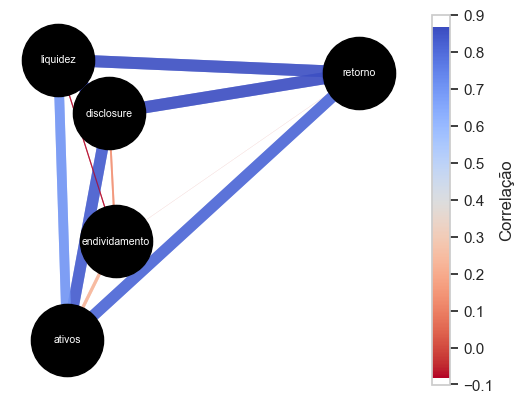

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Criação de um grafo direcionado
G = nx.DiGraph()

# Adição das variáveis como nós do grafo
for variable in correlation_matrix.columns:
    G.add_node(variable)

# Adição das arestas com espessuras proporcionais às correlações
for i, variable1 in enumerate(correlation_matrix.columns):
    for j, variable2 in enumerate(correlation_matrix.columns):
        if i != j:
            correlation = correlation_matrix.iloc[i, j]
            if abs(correlation) > 0:
                G.add_edge(variable1, variable2, weight=correlation)

# Obtenção da lista de correlações das arestas
correlations = [d["weight"] for _, _, d in G.edges(data=True)]

# Definição da dimensão dos nós
node_size = 2700

# Definição da cor dos nós
node_color = 'black'

# Definição da escala de cores das retas (correspondência com as correlações)
cmap = plt.colormaps.get_cmap('coolwarm_r')

# Criação de uma lista de espessuras das arestas proporcional às correlações
edge_widths = [abs(d["weight"]) * 10 for _, _, d in G.edges(data=True)]

# Criação do layout do grafo com maior distância entre os nós
pos = nx.spring_layout(G, k=0.75)  # k para controlar a distância entre os nós

# Ajuste das posições dos nós das variáveis
pos["retorno"] = (pos["retorno"][0] + 1.8, pos["retorno"][1] + 1.8)
pos["disclosure"] = (pos["disclosure"][0], pos["disclosure"][1] + 1.8)
pos["endividamento"] = (pos["endividamento"][0], pos["endividamento"][1] + 1.8)
pos["ativos"] = (pos["ativos"][0], pos["ativos"][1])
pos["liquidez"] = (pos["liquidez"][0], pos["liquidez"][1] + 1.8)

# Desenho dos nós e das arestas com base nas correlações e espessuras
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,
                       edge_cmap=cmap, alpha=0.7)

# Adição dos rótulos dos nós
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=7.5, font_color='white')

# Ajuste dos limites dos eixos
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")

# Criação da legenda com a escala de cores definida
smp = cm.ScalarMappable(cmap=cmap)
smp.set_array([min(correlations), max(correlations)])
cbar = plt.colorbar(smp, ax=ax, label='Correlação')

# Definição dos ticks da colorbar
cbar.set_ticks(np.arange(round(min(correlations),0) - 0.1,
                         max(correlations) + 0.1, 0.1))

# Exibição do gráfico
plt.show()
    # O "endividamento" é o que menos tem correlação com outras variáveis. Talvez seja a principal candidata a não fazer parte do modelo final. MAS NÃO SABEMOS AINDA!!!

#### Distribuições das variáveis, scatters, valores das correlações e suas respectivas significâncias

<Figure size 2000x1000 with 0 Axes>

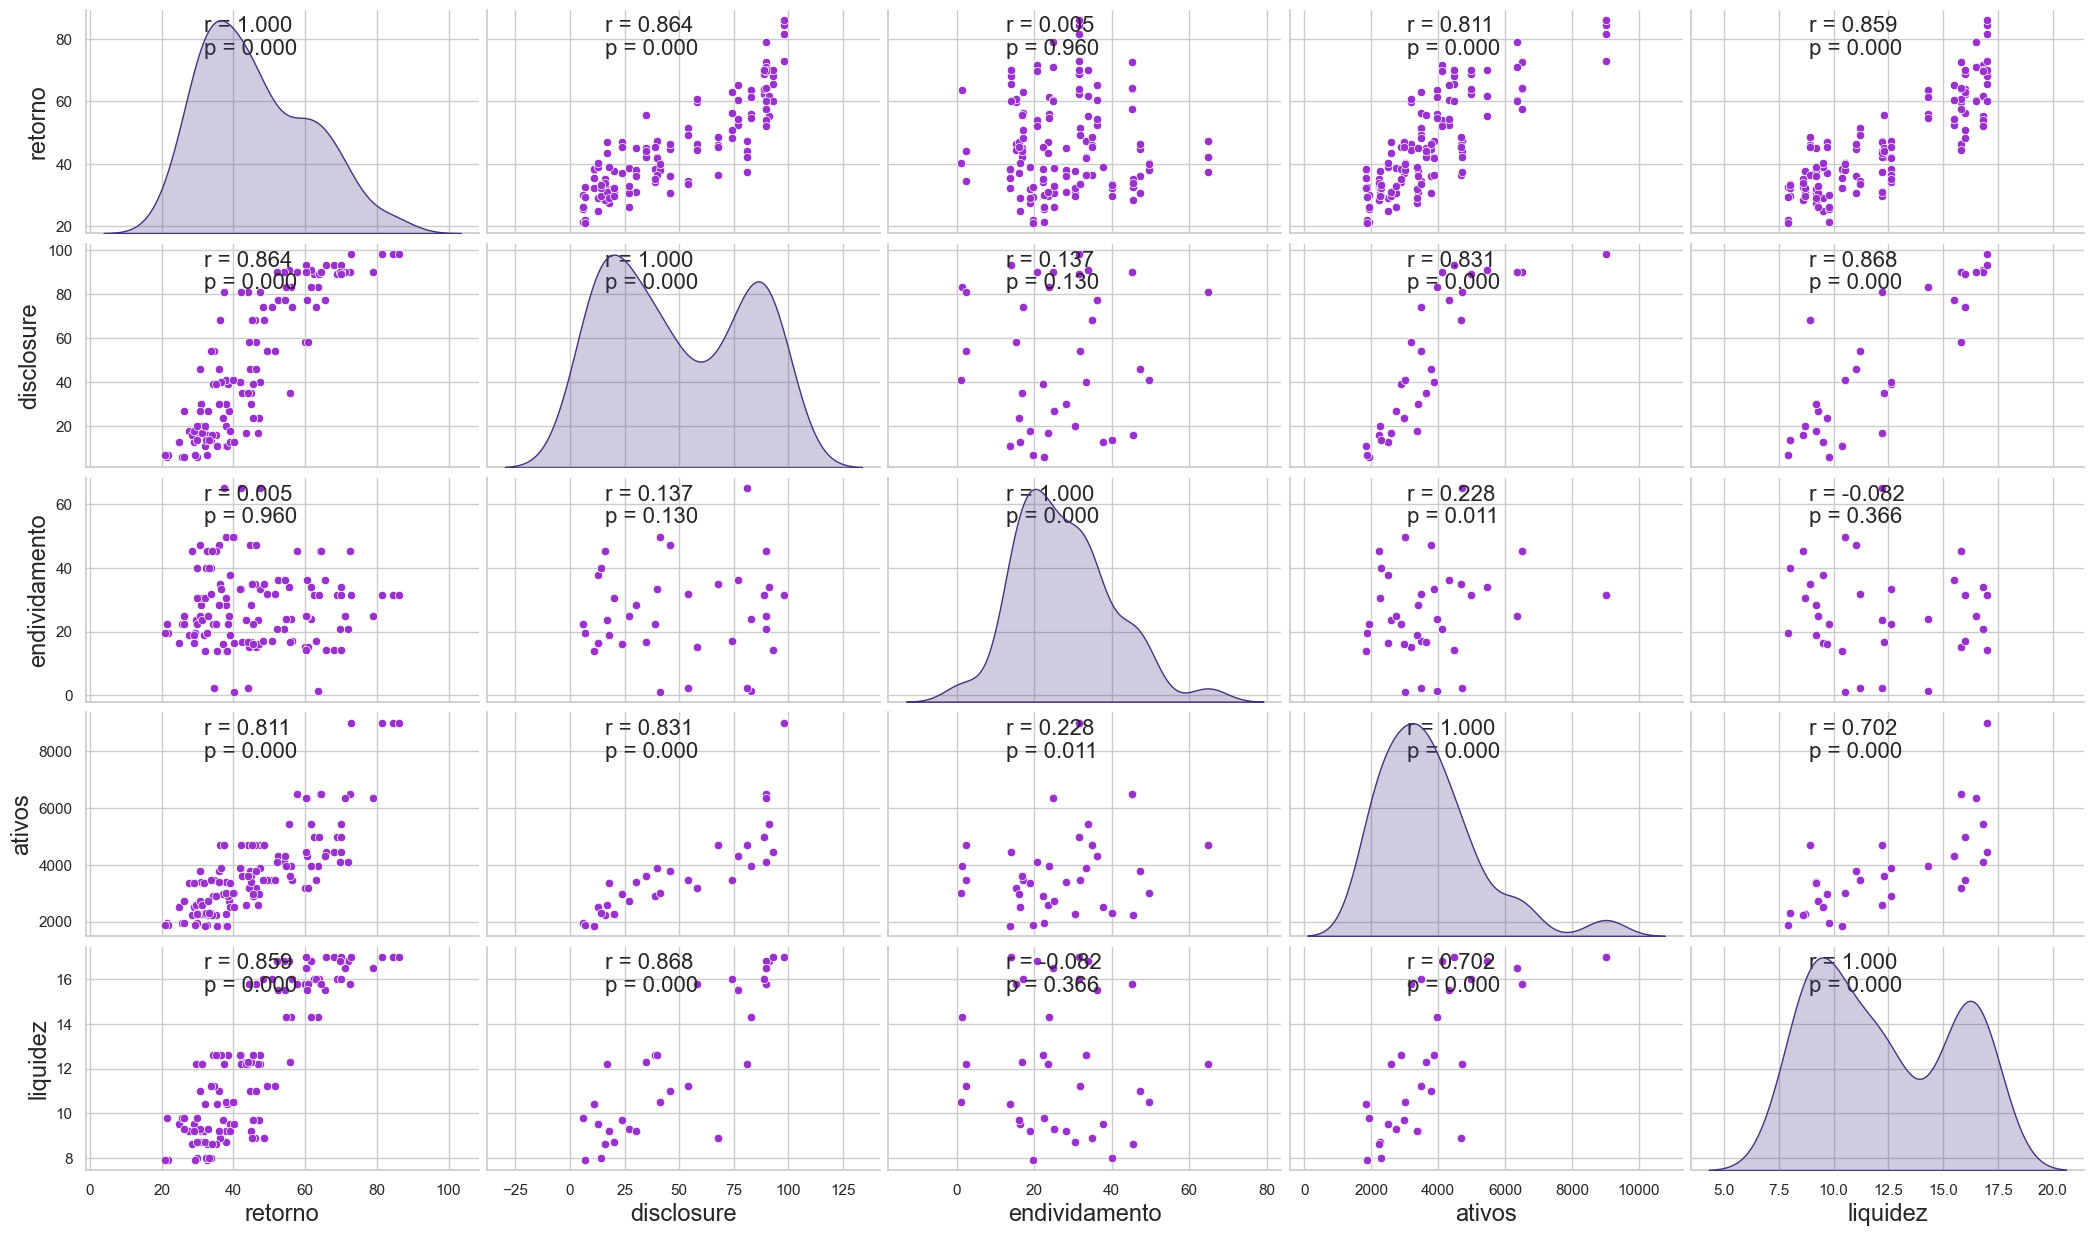

In [13]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r),
                xy=(.30, .9), xycoords=ax.transAxes, fontsize=16)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.30, .8), xycoords=ax.transAxes, fontsize=16)

# Configuração do gráfico
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(20,10))
graph = sns.pairplot(df_empresas, diag_kind="kde",
                     plot_kws={"color": "darkorchid"},
                     height=2.5, aspect=1.7)
graph.map(corrfunc)
for ax in graph.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=17)
    ax.set_ylabel(ax.get_ylabel(), fontsize=17)
plt.show()

#### Estimando o Modelo de Regressão Múltipla

In [17]:
modelo_empresas = sm.OLS.from_formula('retorno ~ disclosure +\
                                      endividamento + ativos +\
                                          liquidez', df_empresas).fit()

# Parâmetros do 'modelo_empresas'
modelo_empresas.summary()
# Note que o parâmetro da variável 'endividamento' não é estatisticamente significante ao nível de significância de 5% (nível de confiança de 95%).
# OBS: Para facilar, vamos aplicar o PROCEDIMENTO "stepwise"

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                retorno   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     147.9
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           3.35e-45
Time:                        17:17:39   Log-Likelihood:                -401.07
No. Observations:                 124   AIC:                             812.1
Df Residuals:                     119   BIC:                             826.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0506      4.080      1.483      0.141      -2.028      14.129
disclosure        0.1067      0.048      2.227      0.028       0.012       0.202
endividamento    -0.0882      0.051     -1.723      0.087      -0.190       0.013
ativos            0.0035      0.001      5.134      0.000       0.002       0.005
liquidez          1.9762      0.396      4.987      0.000       1.191       2.761
==============================================================================
Omnibus:                       35.509   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.127
Skew:                          -0.136   Prob(JB):                       0.0283
Kurtosis:                       1.858   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Procedimento Stepwise
PROCEDIMENTO "stepwise": é um procedimento que faz com que a gente já tenha, no modelo final preditivo, apenas parâmetros que sejam estatisticamente significantes.

In [18]:
from statstests.process import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_empresas = stepwise(modelo_empresas, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 retorno ~ Q('disclosure') + Q('endividamento') + Q('ativos') + Q('liquidez')

 Discarding atribute "Q('endividamento')" with p-value equal to 0.08749071283026512 

Estimating model...: 
 retorno ~ Q('disclosure') + Q('ativos') + Q('liquidez')

 Discarding atribute "Q('disclosure')" with p-value equal to 0.0651402995431081 

Estimating model...: 
 retorno ~ Q('ativos') + Q('liquidez')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('endividamento')", 'p-value': 0.08749071283026512}
{'atribute': "Q('disclosure')", 'p-value': 0.0651402995431081}

 Model after stepwise process...: 
 retorno ~ Q('ativos') + Q('liquidez') 

                            OLS Regression Results                            
Dep. Variable:                retorno   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least 

#### Teste de verificação da aderência dos resíduos à normalidade
Teste de Shapiro-Wilk (n < 30)

Teste de Shapiro-Francia (n >= 30)

In [19]:
from statstests.tests import shapiro_francia

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_empresas.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.973870531849936
statistics z  :  2.0934256948869034
p-value  :  0.018155585344184714
Statistics W=0.97387, p-value=0.018156
Rejeita-se H0 - Distribuição não aderente à normalidade


#### Plotando os resíduos do 'modelo_step_empresas' e acrescentando uma curva normal teórica para comparação entre as distribuições
Kernel density estimation (KDE) - forma não-paramétrica para estimação da função densidade de probabilidade de determinada variável

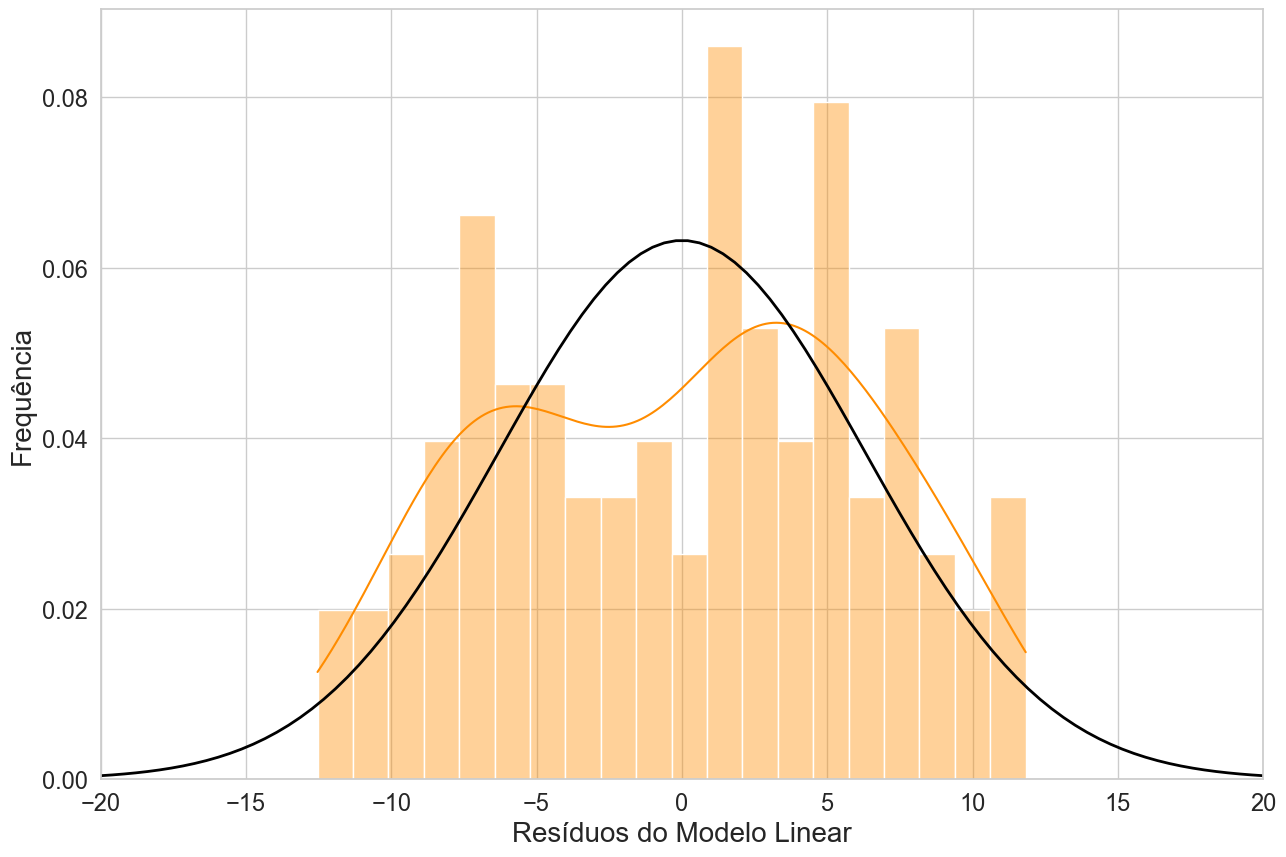

In [20]:
from scipy.stats import norm

# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_step_empresas.resid)

# Gráfico propriamente dito
plt.figure(figsize=(15,10))
sns.histplot(modelo_step_empresas.resid, bins=20, kde=True, stat="density",
             color='darkorange', alpha=0.4)
plt.xlim(-20, 20)
x = np.linspace(-20, 20, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Linear', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

#### Transformação de Box-Cox

In [21]:
# Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

# 'yast' é uma variável que traz os valores transformados (Y*)
# 'lmbda' é o lambda de Box-Cox
yast, lmbda = boxcox(df_empresas['retorno'])

print("Lambda: ",lmbda)

Lambda:  -0.022564100754067663


#### Inserindo o lambda de Box-Cox no dataset para a estimação de um novo modelo

In [24]:
df_empresas['bc_retorno'] = yast
df_empresas

,empresa,retorno,disclosure,endividamento,ativos,liquidez,bc_retorno,bc_retorno2
0,Adidas,63.67,83,1.3,3967,14.3,3.965002,3.965002
1,BASF,55.49,91,33.9,5450,16.8,3.839599,3.839599
2,Bayer,52.42,77,36.1,4327,15.5,3.787582,3.787582
3,BSH,54.00,90,20.8,4109,16.8,3.814731,3.814731
4,Bosch,68.01,93,14.1,4458,17.0,4.024999,4.024999
...,...,...,...,...,...,...,...,...
119,DuPont,39.85,41,49.5,2996,10.5,3.536070,3.536070
120,ExxonMobil,44.16,35,16.8,3622,12.3,3.630464,3.630464
121,FedEx,45.38,24,16.1,2972,9.7,3.655476,3.655476
122,Ford Motors,45.25,68,34.8,4691,8.9,3.652844,3.652844


In [25]:
# Verificação do cálculo, apenas para fins didáticos
df_empresas['bc_retorno2'] = ((df_empresas['retorno'])**(lmbda) - 1) / (lmbda)
df_empresas

,empresa,retorno,disclosure,endividamento,ativos,liquidez,bc_retorno,bc_retorno2
0,Adidas,63.67,83,1.3,3967,14.3,3.965002,3.965002
1,BASF,55.49,91,33.9,5450,16.8,3.839599,3.839599
2,Bayer,52.42,77,36.1,4327,15.5,3.787582,3.787582
3,BSH,54.00,90,20.8,4109,16.8,3.814731,3.814731
4,Bosch,68.01,93,14.1,4458,17.0,4.024999,4.024999
...,...,...,...,...,...,...,...,...
119,DuPont,39.85,41,49.5,2996,10.5,3.536070,3.536070
120,ExxonMobil,44.16,35,16.8,3622,12.3,3.630464,3.630464
121,FedEx,45.38,24,16.1,2972,9.7,3.655476,3.655476
122,Ford Motors,45.25,68,34.8,4691,8.9,3.652844,3.652844


In [26]:
del df_empresas['bc_retorno2']

#### Estimando um novo modelo múltiplo com variável dependente transformada por Box-Cox

In [27]:
modelo_bc = sm.OLS.from_formula('bc_retorno ~ disclosure +\
                                endividamento + ativos +\
                                    liquidez', df_empresas).fit()

# Parâmetros do 'modelo_bc'
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_retorno   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     119.9
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           8.80e-41
Time:                        17:26:08   Log-Likelihood:                 74.551
No. Observations:                 124   AIC:                            -139.1
Df Residuals:                     119   BIC:                            -125.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8844      0.088     32.752      0.000       2.710       3.059
disclosure        0.0034      0.001      3.291      0.001       0.001       0.005
endividamento    -0.0013      0.001     -1.133      0.260      -0.003       0.001
ativos         4.331e-05   1.46e-05      2.967      0.004    1.44e-05    7.22e-05
liquidez          0.0359      0.009      4.202      0.000       0.019       0.053
==============================================================================
Omnibus:                        3.781   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.267
Skew:                          -0.303   Prob(JB):                        0.195
Kurtosis:                       2.486   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Aplicando o procedimento Stepwise no 'modelo_bc"

In [28]:
modelo_step_empresas_bc = stepwise(modelo_bc, pvalue_limit=0.05)

# Note que a variável 'disclosure' retorna ao modelo na forma funcional não linear!

Regression type: OLS 

Estimating model...: 
 bc_retorno ~ Q('disclosure') + Q('endividamento') + Q('ativos') + Q('liquidez')

 Discarding atribute "Q('endividamento')" with p-value equal to 0.2596629165625873 

Estimating model...: 
 bc_retorno ~ Q('disclosure') + Q('ativos') + Q('liquidez')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('endividamento')", 'p-value': 0.2596629165625873}

 Model after stepwise process...: 
 bc_retorno ~ Q('disclosure') + Q('ativos') + Q('liquidez') 

                            OLS Regression Results                            
Dep. Variable:             bc_retorno   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     159.0
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.21e-41
Time:                        17:26:53   Log-Likelihood

#### Verificando a normalidade dos resíduos do 'modelo_step_empresas_bc'

In [29]:
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_empresas_bc.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9870486145293818
statistics z  :  0.6866622509558542
p-value  :  0.24614779513014567
Statistics W=0.98705, p-value=0.246148
Não se rejeita H0 - Distribuição aderente à normalidade


#### Plotando os novos resíduos do 'modelo_step_empresas_bc' e acrescentando uma curva normal teórica para comparação entre as distribuições

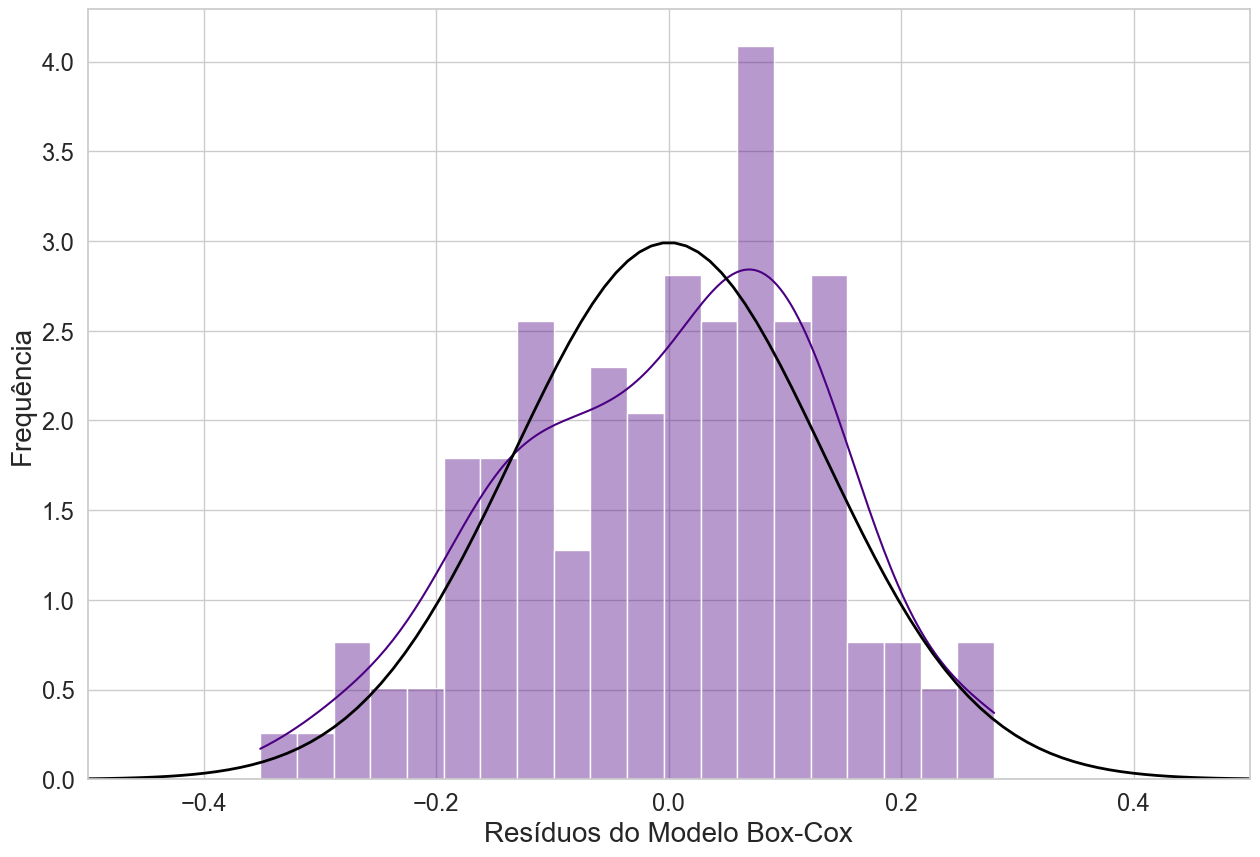

In [30]:
from scipy.stats import norm

# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_step_empresas_bc.resid)

# Gráfico propriamente dito
plt.figure(figsize=(15,10))
sns.histplot(modelo_step_empresas_bc.resid, bins=20, kde=True, stat="density",
             color='indigo', alpha=0.4)
plt.xlim(-0.5, 0.5)
x = np.linspace(-0.5, 0.5, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Box-Cox', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

#### Resumo dos dois modelos obtidos pelo procedimento Stepwise (linear e com Box-Cox)

In [31]:
summary_col([modelo_step_empresas, modelo_step_empresas_bc],
            model_names=["STEPWISE","STEPWISE BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

# CUIDADO!!! OS PARÂMETROS NÃO SÃO DIRETAMENTE COMPARÁVEIS!

,STEPWISE,STEPWISE BOX-COX
Intercept,-2.5348,2.8275***
,(2.3409),(0.0725)
Q('ativos'),0.0040***,0.0000***
,(0.0005),(0.0000)
Q('disclosure'),,0.0031***
,,(0.0010)
Q('liquidez'),2.7391***,0.0398***
,(0.2575),(0.0078)
R-squared,0.8234,0.7990
R-squared Adj.,0.8205,0.7940


# <div style="text-align: green; color: red;">Fazendo predições com o 'modelo_step_empresas_bc'</div>

In [34]:
val_retorno = modelo_step_empresas_bc.predict(pd.DataFrame({'const':[1],
                                              'disclosure':[50],
                                              'ativos':[4000],
                                              'liquidez':[14]}))
val_retorno

0    3.702016
dtype: float64

# <div style="text-align: green; color: orange;">Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted value de Y (variável 'retorno') !!!</div>

In [35]:
(val_retorno * lmbda + 1) ** (1 / lmbda)

0    47.742598
dtype: float64

#### Salvando os fitted values de 'modelo_step_empresas' e 'modelo_step_empresas_bc'

In [36]:
df_empresas['yhat_step_empresas'] = modelo_step_empresas.fittedvalues
df_empresas['yhat_step_empresas_bc'] = (modelo_step_empresas_bc.fittedvalues
                                        * lmbda + 1) ** (1 / lmbda)

In [37]:
# Visualizando os dois fitted values dos modelos 'modelo_step_empresas' e
#'modelo_step_empresas_bc' no dataset
df_empresas[['empresa','retorno','yhat_step_empresas','yhat_step_empresas_bc']]

,empresa,retorno,yhat_step_empresas,yhat_step_empresas_bc
0,Adidas,63.67,52.590460,54.072393
1,BASF,55.49,65.403203,66.165319
2,Bayer,52.42,57.325376,56.706216
3,BSH,54.00,60.009319,62.161048
4,Bosch,68.01,61.960912,64.337230
...,...,...,...,...
119,DuPont,39.85,38.276327,38.078000
120,ExxonMobil,44.16,45.724617,41.446025
121,FedEx,45.38,35.988530,34.685312
122,Ford Motors,45.25,40.711577,41.929545


#### Ajustes dos modelos: valores previstos (fitted values) X valores reais

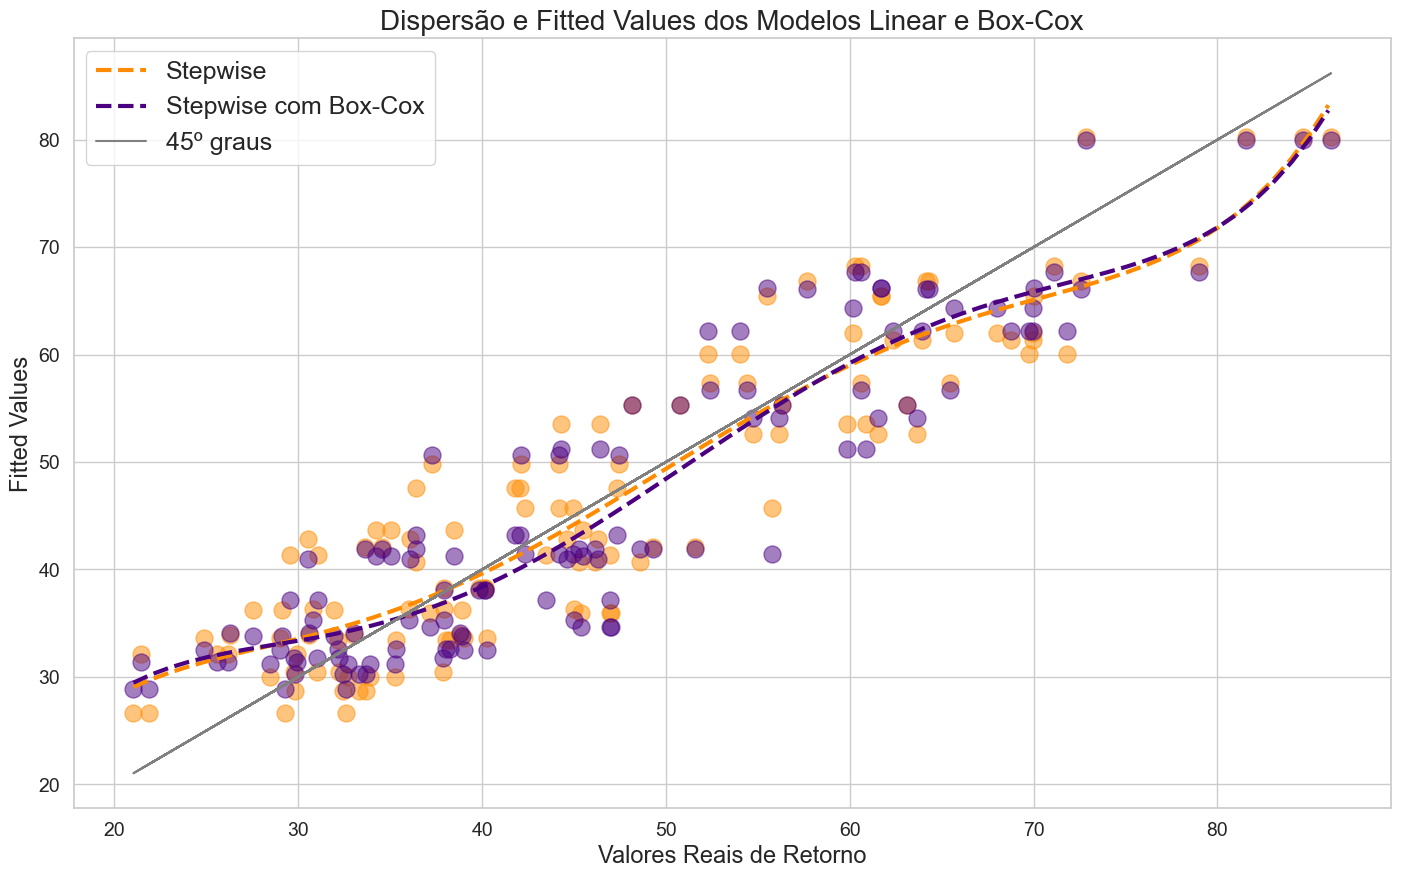

In [38]:
from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df_empresas['retorno']
ydata_linear = df_empresas['yhat_step_empresas']
ydata_bc = df_empresas['yhat_step_empresas_bc']

plt.figure(figsize=(17,10))

popt, _ = curve_fit(objective, xdata, ydata_linear)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='darkorange', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_bc)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='indigo', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_linear, alpha=0.5, s=150, color='darkorange')
plt.scatter(xdata,ydata_bc, alpha=0.5, s=150, color='indigo')
plt.title('Dispersão e Fitted Values dos Modelos Linear e Box-Cox',
          fontsize=20)
plt.xlabel('Valores Reais de Retorno', fontsize=17)
plt.ylabel('Fitted Values', fontsize=17)
plt.legend(['Stepwise','Stepwise com Box-Cox','45º graus'], fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# <div style="text-align: center;">FIM!</div>